##Grupo Marisqueria Chanquesito:

##Amir Vera Castro,     20212159                        
##Angie Urrutia Flores, 20230313                                           
##Giacomo Saenz,        20232069                                    
##Paolo Robles Prado,   20203849                  


# Análisis de estrés en adultos basado en hábitos de vida

Este notebook adapta el análisis realizado originalmente sobre estudiantes, aplicándolo a un conjunto de datos real sobre adultos con variables relacionadas al estilo de vida, salud y estrés.
El objetivo es investigar cómo distintos hábitos diarios influyen en los niveles de estrés reportados.


## Importación de librerias

In [19]:
# 1. Instalación de librerías necesarias
!pip install kaggle
!pip install autoviz
!pip install opendatasets

# 2. Importación de librerías
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
from google.colab import drive
import os
import opendatasets as od # Import the opendatasets library and assign it to the alias 'od'

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [10]:
od.download("https://www.kaggle.com/datasets/shijo96john/stress-level-prediction")
dataset_path = "/content/stress-level-prediction" # Corrected dataset path
print("Archivos descargados:")
print(os.listdir(dataset_path))

# Construye la ruta completa al archivo CSV
csv_file_path = os.path.join(dataset_path, "stress_detection_data.csv")
print(csv_file_path)

# Carga el archivo CSV usando la ruta correcta
try:
    titanic= pd.read_csv(csv_file_path)
    print("Muy bien: tus emociones y tu dataset han sido validados :)")
except FileNotFoundError:
    print(f"No se encontró el archivo CSV en la ruta: {csv_file_path}")
    print("Asegúrate de que el archivo 'Stress_detection_data.csv' exists inside the folder '/content/stress-level-prediction'.")

Skipping, found downloaded files in "./stress-level-prediction" (use force=True to force download)
Archivos descargados:
['stress_detection_data.csv']
/content/stress-level-prediction/stress_detection_data.csv
Muy bien: tus emociones y tu dataset han sido validados :)


In [11]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('./stress-level-prediction/stress_detection_data.csv')

traduccion_columnas = {
    'Sleep_Duration': 'Duracion_sueño',
    'Sleep_Quality': 'Calidad_sueño',
    'Physical_Activity': 'Actividad_fisica',
    'Screen_Time': 'Horas_pantalla',
    'Work_Hours': 'Horas_trabajo',
    'Travel_Time': 'Tiempo_desplazamiento',
    'Social_Interactions': 'Interacciones_sociales',
    'Meditation_Practice': 'Meditacion',
    'Caffeine_Intake': 'Consumo_Cafeína',
    'Alcohol_Intake': 'Consumo_Alcohol',
    'Smoking_Habit': 'Habito_fumar',
    'Stress_Detection': 'Nivel_estrés'
}

# Traducir columnas
df_es = df.rename(columns=traduccion_columnas)

# Seleccionar solo las variables traducidas
vars_es = list(traduccion_columnas.values())
df_final = df_es[vars_es]

# Mostrar resultados
print("=== Primeras 5 filas ===")
display(df_final.head())

print("\n=== Tipos de datos ===")
print(df_final.dtypes)

print("\n=== Distribución de estrés =====")
print(df_final['Nivel_estrés'].value_counts())

=== Primeras 5 filas ===


,Duracion_sueño,Calidad_sueño,Actividad_fisica,Horas_pantalla,Horas_trabajo,Tiempo_desplazamiento,Interacciones_sociales,Meditacion,Consumo_Cafeína,Consumo_Alcohol,Habito_fumar,Nivel_estrés
0,7.0,4.0,2.0,4.0,8,1.0,5,Yes,1,0,No,Low
1,6.0,3.0,1.0,3.0,9,2.0,3,No,0,1,No,Medium
2,7.0,4.0,2.0,4.0,8,1.0,5,Yes,1,0,No,High
3,7.0,4.0,2.0,4.0,8,1.0,5,Yes,1,0,No,Low
4,8.0,5.0,3.0,2.0,7,1.0,4,Yes,1,0,No,Low



=== Tipos de datos ===
Duracion_sueño            float64
Calidad_sueño             float64
Actividad_fisica          float64
Horas_pantalla            float64
Horas_trabajo               int64
Tiempo_desplazamiento     float64
Interacciones_sociales      int64
Meditacion                 object
Consumo_Cafeína             int64
Consumo_Alcohol             int64
Habito_fumar               object
Nivel_estrés               object
dtype: object

=== Distribución de estrés =====
Nivel_estrés
Medium    310
High      301
Low       162
Name: count, dtype: int64


In [18]:
df_final['Nivel_estrés'] = df_final['Nivel_estrés'].replace({
    'Low': 'Bajo',
    'Medium': 'Mediano',
    'High': 'Alto'
})

print(df_final['Nivel_estrés'].value_counts())

Nivel_estrés
Mediano    310
Alto       301
Bajo       162
Name: count, dtype: int64


**Información del dataset**

- 22 columnas y 773 filas
- No hay valores nulos

**Variable objetivo:**

- Variable categórica ordinal

- "Nivel_estrés" con niveles "Bajo", "Mediano", "Alto"

**Observaciones iniciales**

- Cerca del 80% de la población estudiada presenta niveles de estrés medio o alto, lo que indica que es un problema de salud relevante en este grupo.

- Los casos de estrés alto (301) y medio (310) son prácticamente equivalentes, con solo 9 casos de diferencia.

## Descripción de las variables a utilizar



| Variable            | Descripción                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
| Duracion_sueño      | Cantidad total de sueño que el individuo obtiene en promedio (en horas).                       |
| Calidad_sueño    | Calidad del sueño autoinformada en una escala (por ejemplo, 1-5).                              |
| Actividad_fisica   | Frecuencia de actividad física (por ejemplo, número de días/semana o una puntuación).          |
| Horas_pantalla         | Número promedio de horas dedicadas a pantallas electrónicas por día.                           |
| Horas_trabajo         | Número de horas trabajadas por semana.                                                         |
| Tiempo_desplazamiento        | Tiempo dedicado al desplazamiento (por ejemplo, en horas por día).                             |
| Interacciones_sociales | Frecuencia de interacciones sociales (por ejemplo, número de eventos sociales a los que asiste).|
| Meditacion | Si el individuo practica meditación (Sí/No).                                                   |
| Consumo_Cafeína     | Cantidad promedio de cafeína consumida (por ejemplo, tazas de café).                           |
| Consumo_Alcohol      | Cantidad promedio de alcohol consumido (por ejemplo, número de bebidas por semana).            |
| Habito_fumar       | Si el individuo fuma (Sí/No).                                                                  |
| Nivel_estrés    | Clasificación o indicador del nivel de estrés del individuo (por ejemplo, Alto, Medio, Bajo).  |

--------------------------------------------------------------------------------

In [ ]:
print("\nResumen estadístico:")
display(df_final.describe().T)


Resumen estadístico:


,count,mean,std,min,25%,50%,75%,max
Duracion_sueño,773.0,6.338422,0.733584,3.5,6.0,6.3,7.0,8.0
Calidad_sueño,773.0,3.848124,0.545459,2.0,3.6,3.9,4.0,5.0
Actividad_fisica,773.0,2.979301,0.797234,1.0,2.0,3.0,4.0,5.0
Horas_pantalla,773.0,4.105433,0.812513,2.0,4.0,4.0,5.0,8.0
Horas_trabajo,773.0,8.258732,1.064168,6.0,8.0,8.0,9.0,14.0
Tiempo_desplazamiento,773.0,2.858344,1.083758,0.5,2.0,3.0,4.0,5.0
Interacciones_sociales,773.0,3.196636,0.856332,1.0,3.0,3.0,4.0,5.0
Consumo_Cafeína,773.0,1.818887,0.838396,0.0,1.0,2.0,2.0,4.0
Consumo_Alcohol,773.0,0.888745,0.673741,0.0,0.0,1.0,1.0,2.0


**Descripción del Dataset**

Este conjunto de datos contiene información sobre los hábitos de vida, la salud y los indicadores de detección del estrés de las personas. Está estructurado en columnas que representan diversos factores que podrían influir o correlacionarse con el bienestar físico y mental de una persona, especialmente en relación con el estrés. Cada fila representa a una persona única con datos en diversas áreas, como patrones de sueño, actividad física, alimentación y medidas de salud.

**Observaciones iniciales**

1. **Patrones de sueño**
- En promedio, 6.34 horas (rango: 3.5-8h)  
- La mayoría no alcanza las 8h recomendadas.

- **Calidad del sueño**:
- Media de 3.85/5, la mayoría de datos se encuentra entre el rango de 2-5.  
  - La calidad media-alta de sueño podría mitigar el estrés.

2. **Carga laboral**
- Horas en promedio: 8.26h/día (rango: 6-14h)  
- Es interesante ver el vínculo con el estrés alto en estos casos.

3. **Consumo de sustancias**
- En promedio, consume cafeína 1.82 tazas/día (rango: 0-4)  
  - Se podría ver la relación de esta variable con los trastornos de sueño.

- En promedio, consumen 0.89 copas/semana (rango: 0-2)  
  - En general, se podría decir que hay un bajo consumo.


## Exploración de los valores únicos

Como referencia, el estudio de valores únicos (unique value exploration) se lleva a cabo para comprender la diversidad y granularidad de los datos.

In [13]:
# Display the number of unique values in each column
print("\nValores únicos en cada columna:")
print(df_final.nunique())


Valores únicos en cada columna:
Duracion_sueño            35
Calidad_sueño             19
Actividad_fisica           7
Horas_pantalla             9
Horas_trabajo              8
Tiempo_desplazamiento      8
Interacciones_sociales     5
Meditacion                 2
Consumo_Cafeína            5
Consumo_Alcohol            3
Habito_fumar               2
Nivel_estrés               3
dtype: int64


In [22]:
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df_final.select_dtypes(include=['object']).columns.tolist()

print("\nColumnas numéricas:", numerical_columns)
print("Columnas categóricas:", non_numerical_columns)


Columnas numéricas: ['Duracion_sueño', 'Calidad_sueño', 'Actividad_fisica', 'Horas_pantalla', 'Horas_trabajo', 'Tiempo_desplazamiento', 'Interacciones_sociales', 'Consumo_Cafeína', 'Consumo_Alcohol']
Columnas categóricas: ['Meditacion', 'Habito_fumar', 'Nivel_estrés']


In [21]:
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df_final[col].unique()}")


Column: Meditacion
Unique Values: ['Yes' 'No']

Column: Habito_fumar
Unique Values: ['No' 'Yes']

Column: Nivel_estrés
Unique Values: ['Bajo' 'Mediano' 'Alto']


Análisis exploratorio adicional (EDA)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

# Subgráfico 1: Conteo de categorías
plt.subplot(1, 2, 1)
sns.countplot(y='Nivel_estrés', data=df_final, palette='muted')
plt.title('Distribución del Nivel de Estrés')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')
sns.despine(left=True, bottom=True)

# Subgráfico 2: Gráfico de pastel
plt.subplot(1, 2, 2)
df_final['Nivel_estrés'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette('muted'),
    startangle=90,
    explode=[0.05]*df_final['Nivel_estrés'].nunique()
)
plt.title('Porcentaje por Nivel de Estrés')
plt.ylabel('')

plt.tight_layout()
plt.show()

El análisis exploratorio de datos realizado a partir de los gráficos revela patrones importantes sobre el nivel de estrés y su relación con diversos hábitos de vida. En primer lugar, la distribución del nivel de estrés muestra que la mayoría de los individuos se encuentran en un estado de estrés moderado, seguido por aquellos con estrés alto y, en menor medida, estrés bajo. Esta tendencia indica que el estrés es una condición común en la muestra analizada y que los niveles elevados o medios son predominantes, posiblemente por factores laborales o de estilo de vida.

In [23]:
# Lista de columnas numéricas a analizar
columnas_numericas = [
    'Duracion_sueño', 'Calidad_sueño', 'Actividad_fisica',
    'Horas_pantalla', 'Horas_trabajo', 'Tiempo_desplazamiento', 'Interacciones_sociales'
]

# Histograma + curva KDE para cada variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))
colores = sns.color_palette("muted", len(columnas_numericas))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_final[col], kde=True, bins=10, color=colores[i - 1])
    plt.title(f'{col.replace("_", " ")}')
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Respecto a las variables continuas analizadas mediante histogramas y curvas de densidad (KDE), se observa que la duración y calidad del sueño están centradas en valores intermedios, lo cual sugiere cierta regularidad en los hábitos de descanso, aunque no necesariamente en niveles óptimos. Por otro lado, variables como la actividad física y el tiempo frente a pantallas presentan distribuciones más asimétricas, indicando que existen subgrupos con poca actividad o con un uso elevado de dispositivos electrónicos. Además, se nota que las interacciones sociales y la meditación tienden a ser prácticas poco frecuentes en la muestra, lo cual podría influir negativamente en el bienestar emocional.

In [ ]:
# Boxplots de cada variable numérica frente al nivel de estrés
plt.figure(figsize=(14, 12))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Nivel_estrés', y=col, data=df_final, palette='muted')
    plt.title(f'{col.replace("_", " ")} según Nivel de Estrés')
    plt.xlabel('Nivel de Estrés')
    plt.ylabel(col.replace('_', ' '))

plt.tight_layout()
plt.show()

Al comparar los niveles de estrés con las distintas variables numéricas mediante diagramas de caja (boxplots), se identifican relaciones claras. Los individuos con mayor nivel de estrés tienden a dormir menos, reportan menor calidad de sueño y mayor exposición a pantallas. También suelen tener más horas de trabajo y tiempo de desplazamiento, lo que puede generar una sobrecarga física y mental. En contraste, aquellos con menor estrés presentan más actividad física, mejores hábitos de sueño y mayores interacciones sociales, sugiriendo que estas variables actúan como factores protectores.

In [ ]:
# Solo columnas numéricas
df_num = df_final[columnas_numericas]

# Calcular la matriz de correlación
plt.figure(figsize=(10, 8))
matriz_corr = df_num.corr()

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

Finalmente, el mapa de calor de correlación permite observar relaciones entre variables numéricas. Se destaca una correlación negativa entre las horas de pantalla y la calidad del sueño, coherente con estudios que señalan cómo el uso excesivo de dispositivos electrónicos afecta el descanso. Asimismo, la actividad física se asocia positivamente con la duración del sueño y las interacciones sociales, lo que refleja un estilo de vida más saludable en conjunto. También se evidencia que las horas de trabajo y el tiempo de desplazamiento están relacionadas entre sí, reforzando la idea de que la carga laboral y el traslado contribuyen a niveles más altos de estrés.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas numéricas + variable categórica objetivo
columnas_pairplot = [
    'Duracion_sueño', 'Calidad_sueño', 'Actividad_fisica',
    'Horas_pantalla', 'Horas_trabajo', 'Tiempo_desplazamiento',
    'Interacciones_sociales', 'Nivel_estrés'
]

# Subset del DataFrame
df_pairplot = df_final[columnas_pairplot]

# Ejecutar pairplot
sns.pairplot(df_pairplot, hue='Nivel_estrés', diag_kind='hist', palette='muted')
plt.suptitle('Relaciones entre variables según nivel de estrés', y=1.02)
plt.show()

Este grafico permite observar las relaciones entre las variables numéricas del conjunto de datos segmentadas por nivel de estrés (bajo, medio y alto). Aunque no existe una separación clara entre las categorías, se evidencian ciertos patrones que sugieren asociaciones relevantes. Por ejemplo, los individuos con mayor duración y calidad de sueño tienden a estar más representados en niveles de estrés bajo, mientras que quienes duermen poco y reportan mala calidad de sueño se concentran en niveles de estrés alto. Asimismo, se observa que una mayor actividad física parece estar relacionada con menor estrés, mientras que un uso más prolongado de pantallas presenta una ligera tendencia al estrés elevado. También se identifican asociaciones entre altos niveles de estrés y largas jornadas laborales o extensos tiempos de desplazamiento, lo cual sugiere que estos factores podrían contribuir al malestar emocional. Finalmente, se percibe que una mayor frecuencia de interacciones sociales se vincula con menores niveles de estrés, lo que refuerza la idea de que el soporte social podría actuar como un amortiguador del estrés. En conjunto, este gráfico sugiere que no hay una única variable determinante del estrés, sino que su nivel parece depender de un conjunto de factores interrelacionados, lo que valida el enfoque multivariable utilizado en el modelo predictivo del proyecto.

# Análisis exploratorio de datos

##INSTALACIÓN DE BIBLIOTECAS

In [2]:
# ==============================================================================
# PASO 1: INSTALAR LAS BIBLIOTECAS NECESARIAS
# ==============================================================================
# Este comando instala la biblioteca para descargar datasets de Kaggle.
!pip install opendatasets

# ==============================================================================
# PASO 2: IMPORTAR TODAS LAS HERRAMIENTAS
# ==============================================================================
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Herramientas de Scikit-learn para el preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# ==============================================================================
# PASO 3: DESCARGAR Y CARGAR LOS DATOS
# ==============================================================================
# Definimos la URL del dataset que queremos descargar
dataset_url = "https://www.kaggle.com/datasets/shijo96john/stress-level-prediction/data"

print("Iniciando la descarga del dataset de Kaggle...")
# Continuar descarga
od.download(dataset_url)
print("Descarga completada.")

# Definir la ruta donde se guardó el dataset
# El nombre de la carpeta suele ser el nombre del dataset en la URL
dataset_path = "./stress-level-prediction"

# Buscar y cargar el archivo CSV de forma automática
try:
    file_list = os.listdir(dataset_path)
    print(f"\nArchivos encontrados en la carpeta: {file_list}")

    # Buscamos automáticamente cualquier archivo que termine en .csv
    csv_files = [f for f in file_list if f.endswith('.csv')]

    if csv_files:
        # Tomamos el primer archivo CSV encontrado
        csv_file_name = csv_files[0]
        csv_file_path = os.path.join(dataset_path, csv_file_name)

        print(f"\nCargando el archivo CSV: '{csv_file_name}'")
        stress_df = pd.read_csv(csv_file_path)

        print("\n¡Éxito! El dataset se ha cargado correctamente.")
        print("Estas son las primeras 5 filas:")
        print(stress_df.head())

    else:
        print("\nError: No se encontró ningún archivo .csv en la carpeta del dataset.")
        stress_df = None

except FileNotFoundError:
    print(f"\nError: No se pudo encontrar la carpeta del dataset en la ruta '{dataset_path}'. Asegúrate de que la descarga fue exitosa.")
    stress_df = None
except Exception as e:
    print(f"\nOcurrió un error inesperado: {e}")
    stress_df = None


Iniciando la descarga del dataset de Kaggle...
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: giacomosss
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shijo96john/stress-level-prediction


100%|██████████| 12.3k/12.3k [00:00<00:00, 2.37MB/s]


Descarga completada.

Archivos encontrados en la carpeta: ['stress_detection_data.csv']

Cargando el archivo CSV: 'stress_detection_data.csv'

¡Éxito! El dataset se ha cargado correctamente.
Estas son las primeras 5 filas:
   Age  Gender         Occupation Marital_Status  Sleep_Duration  \
0   30    Male  Software Engineer         Single             7.0   
1   35  Female  Marketing Manager        Married             6.0   
2   40    Male     Data Scientist       Divorced             7.0   
3   35    Male  Software Engineer         Single             7.0   
4   29  Female            Teacher         Single             8.0   

   Sleep_Quality Wake_Up_Time  Bed_Time  Physical_Activity  Screen_Time  ...  \
0            4.0      7:00 AM  10:00 PM                2.0          4.0  ...   
1            3.0      6:00 AM  11:00 PM                1.0          3.0  ...   
2            4.0      7:00 AM  10:00 PM                2.0          4.0  ...   
3            4.0      7:00 AM  10:00 PM        

## PREPROCESAMIENTO DE DATOS


--- Iniciando el preprocesamiento de datos ---

Forma de las características (X): (773, 11)
Forma de la variable objetivo (y): (773,)

Se detectaron y eliminaron 8 valores atípicos.
Nueva forma de X: (765, 11)
Nueva forma de y: (765,)

Datos divididos en conjuntos de entrenamiento y prueba.
Características escaladas con RobustScaler.


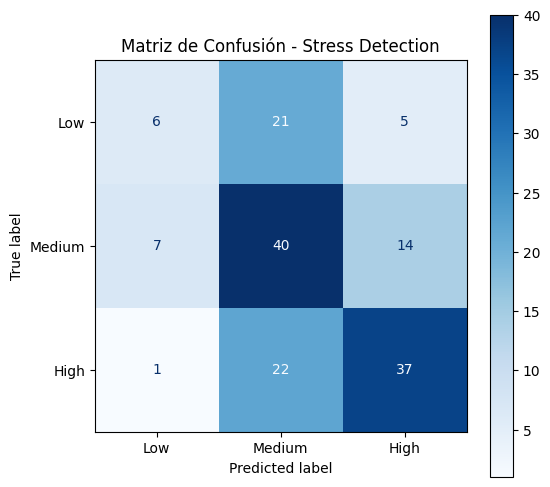

In [3]:
# ==============================================================================
# PASO 4: PROCESAMIENTO DE DATOS
# ==============================================================================
if stress_df is not None:
    print("\n--- Iniciando el preprocesamiento de datos ---")

    # 1. Seleccionar las variables que nos interesan
    variables_interes = [
        "Sleep_Duration", "Sleep_Quality", "Physical_Activity", "Screen_Time",
        "Work_Hours", "Travel_Time", "Social_Interactions", "Meditation_Practice",
        "Caffeine_Intake", "Alcohol_Intake", "Smoking_Habit", "Stress_Detection"
    ]
    df_trabajo = stress_df[variables_interes].copy()

    # 2. Codificar variables categóricas (como 'Smoking_Habit')
    le_smoking = LabelEncoder()
    df_trabajo['Smoking_Habit'] = le_smoking.fit_transform(df_trabajo['Smoking_Habit'])

    # 3. Definir las características (X) y la variable objetivo (y)
    X = df_trabajo.drop(columns=['Stress_Detection'])
    y = df_trabajo['Stress_Detection']

    print("\nForma de las características (X):", X.shape)
    print("Forma de la variable objetivo (y):", y.shape)

    # Encode 'Meditation_Practice' column
    le_meditation = LabelEncoder()
    X['Meditation_Practice'] = le_meditation.fit_transform(X['Meditation_Practice'])

    # Encode 'Stress_Detection' column
    le_stress = LabelEncoder()
    y_encoded = le_stress.fit_transform(y)

    # 4. Detección y eliminación de valores atípicos (Outliers)
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    outliers = iso_forest.fit_predict(X)
    outlier_indices = np.where(outliers == -1)[0]

    X_filtered = X.drop(outlier_indices).reset_index(drop=True)
    y_filtered = y_encoded[~np.isin(np.arange(len(y_encoded)), outlier_indices)]
    y_filtered = pd.Series(y_filtered).reset_index(drop=True)


    print(f"\nSe detectaron y eliminaron {len(outlier_indices)} valores atípicos.")
    print("Nueva forma de X:", X_filtered.shape)
    print("Nueva forma de y:", y_filtered.shape)

    # 5. División en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
    )
    print("\nDatos divididos en conjuntos de entrenamiento y prueba.")

    # 6. Escalado de características
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    print("Características escaladas con RobustScaler.")

    # 7. Entrenar modelo
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # 8. Predicción
    y_pred = model.predict(X_test)

    # 9. Matriz de confusión
    from sklearn.metrics import ConfusionMatrixDisplay
    etiquetas = ["Low", "Medium", "High"]
    etiquetas_encoded = le_stress.transform(etiquetas)

    cm = confusion_matrix(y_test, y_pred, labels=etiquetas_encoded)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etiquetas)

    # 10. Mostrar la matriz
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap="Blues", values_format="d")
    plt.title("Matriz de Confusión - Stress Detection")
    plt.grid(False)
    plt.show()


# ENTRENAMIENTO Y EVALUACIÓN DE MODELOS



--- Iniciando la evaluación de modelos individuales ---

--- Entrenando y Evaluando: Regresión Logística ---


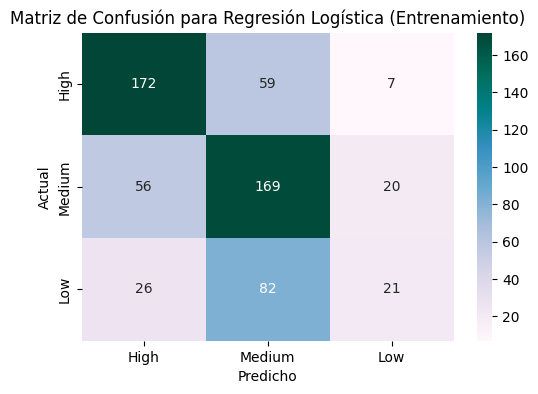


Reporte de Clasificación para Regresión Logística (Entrenamiento):

              precision    recall  f1-score   support

        High       0.68      0.72      0.70       238
      Medium       0.55      0.69      0.61       245
         Low       0.44      0.16      0.24       129

    accuracy                           0.59       612
   macro avg       0.55      0.53      0.52       612
weighted avg       0.57      0.59      0.57       612


--- Entrenando y Evaluando: Árbol de Decisión ---


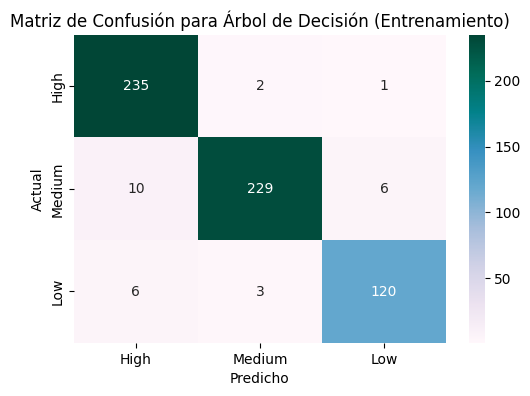


Reporte de Clasificación para Árbol de Decisión (Entrenamiento):

              precision    recall  f1-score   support

        High       0.94      0.99      0.96       238
      Medium       0.98      0.93      0.96       245
         Low       0.94      0.93      0.94       129

    accuracy                           0.95       612
   macro avg       0.95      0.95      0.95       612
weighted avg       0.96      0.95      0.95       612


--- Entrenando y Evaluando: Random Forest ---


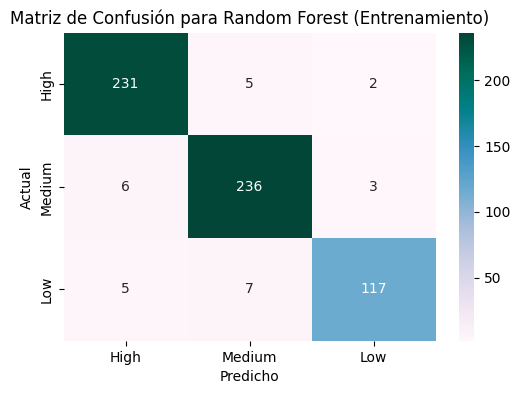


Reporte de Clasificación para Random Forest (Entrenamiento):

              precision    recall  f1-score   support

        High       0.95      0.97      0.96       238
      Medium       0.95      0.96      0.96       245
         Low       0.96      0.91      0.93       129

    accuracy                           0.95       612
   macro avg       0.96      0.95      0.95       612
weighted avg       0.95      0.95      0.95       612


--- Resumen de Evaluación de Modelos Individuales (Datos de Entrenamiento) ---
                     Accuracy       AUC
Regresión Logística  0.591503  0.792432
Árbol de Decisión    0.954248  0.997063
Random Forest        0.954248  0.991957


In [4]:
# ==============================================================================
# PASO 5: ENTRENAMIENTO Y EVALUACIÓN DE MODELOS INDIVIDUALES (CON ORDEN PERSONALIZADO)
# ==============================================================================
if stress_df is not None:
    print("\n--- Iniciando la evaluación de modelos individuales ---")

    models = {
        "Regresión Logística": LogisticRegression(random_state=42, max_iter=1000),
        "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42)
    }

    # Definimos el orden deseado para las etiquetas
    orden_personalizado = ["High", "Medium", "Low"]

    def train_and_evaluate_models(models, X_train, y_train, orden, encoder):
        results = {}
        # Traducimos el orden de texto a su equivalente numérico para las funciones de sklearn
        orden_numerico = encoder.transform(orden)

        for name, model in models.items():
            print(f"\n--- Entrenando y Evaluando: {name} ---")
            model.fit(X_train, y_train)

            y_train_pred = model.predict(X_train)
            accuracy = accuracy_score(y_train, y_train_pred)
            auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class="ovr")
            results[name] = {'Accuracy': accuracy, 'AUC': auc}

            # Usamos el orden numérico para calcular la matriz y el de texto para las etiquetas
            conf_matrix = confusion_matrix(y_train, y_train_pred, labels=orden_numerico)
            plt.figure(figsize=(6, 4))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn',
                        xticklabels=orden, yticklabels=orden)
            plt.title(f'Matriz de Confusión para {name} (Entrenamiento)')
            plt.xlabel('Predicho')
            plt.ylabel('Actual')
            plt.show()

            # Usamos ambos órdenes para generar el reporte correctamente
            print(f"\nReporte de Clasificación para {name} (Entrenamiento):\n")
            print(classification_report(y_train, y_train_pred, labels=orden_numerico, target_names=orden))

        results_df = pd.DataFrame(results).T
        return results_df

    # Pasamos el orden personalizado y el encoder a la función
    evaluation_summary = train_and_evaluate_models(models, X_train, y_train, orden_personalizado, le_stress)

    print("\n--- Resumen de Evaluación de Modelos Individuales (Datos de Entrenamiento) ---")
    print(evaluation_summary)

In [6]:
# ==============================================================================
# PASO 6: ENTRENAMIENTO Y EVALUACIÓN DEL MODELO DE STACKING
# ==============================================================================
# Solo continuamos si el preprocesamiento se completó
if 'stress_df' in locals() and stress_df is not None:
    print("\n--- Iniciando el entrenamiento del modelo de Stacking ---")


    from sklearn.ensemble import StackingClassifier, RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import cross_val_score

    base_models = [
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ]
    meta_model = RandomForestClassifier(random_state=42)
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

    print("\nRealizando validación cruzada para el modelo de Stacking...")
    cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')

    print("Entrenando el modelo final de Stacking...")
    stacking_model.fit(X_train, y_train)
    test_accuracy = stacking_model.score(X_test, y_test)

    print("\n--- Resultados de la Evaluación del Modelo de Stacking ---")
    results = {
        "Cross-Validation Scores": cv_scores.tolist(),
        "Mean CV Accuracy": cv_scores.mean(),
        "Test Set Accuracy": test_accuracy
    }
    print(results)



--- Iniciando el entrenamiento del modelo de Stacking ---

Realizando validación cruzada para el modelo de Stacking...
Entrenando el modelo final de Stacking...

--- Resultados de la Evaluación del Modelo de Stacking ---
{'Cross-Validation Scores': [0.6178861788617886, 0.6260162601626016, 0.6475409836065574, 0.5737704918032787, 0.6229508196721312], 'Mean CV Accuracy': np.float64(0.6176329468212716), 'Test Set Accuracy': 0.6666666666666666}



--- Analizando la importancia de las características del modelo de Stacking ---


/tmp/ipython-input-7-3028555353.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')


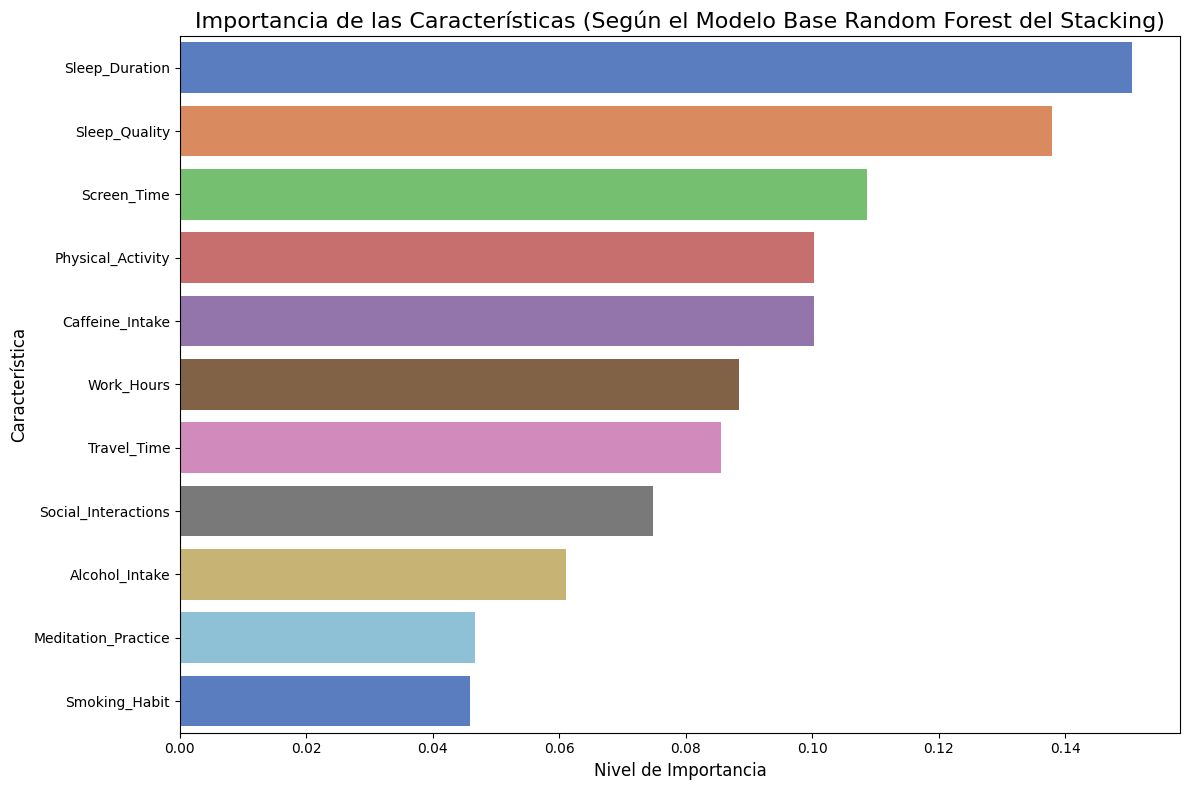

In [7]:
# ==============================================================================
# PASO 7: ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS DEL STACKING
# ==============================================================================
if stress_df is not None:
    print("\n--- Analizando la importancia de las características del modelo de Stacking ---")

    feature_names = X_filtered.columns
    rf_base_model = stacking_model.named_estimators_['rf']
    rf_feature_importances = rf_base_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rf_feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
    plt.title('Importancia de las Características (Según el Modelo Base Random Forest del Stacking)', fontsize=16)
    plt.xlabel('Nivel de Importancia', fontsize=12)
    plt.ylabel('Característica', fontsize=12)
    plt.tight_layout()
    plt.show()


--- Visualizando la distribución de las predicciones en el conjunto de prueba ---


/tmp/ipython-input-8-1907237946.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_pred_mapped, palette='muted', order=custom_order)


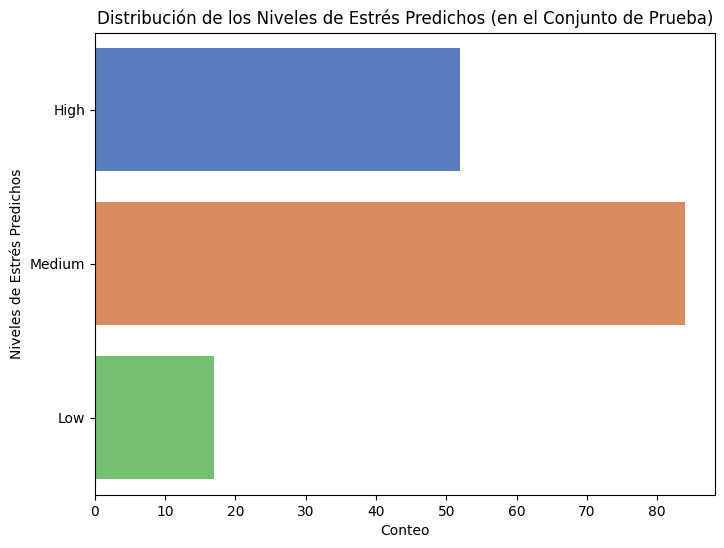

In [8]:
# ==============================================================================
# PASO 8: VISUALIZACIÓN DE LAS PREDICCIONES FINALES (CON ORDEN PERSONALIZADO)
# ==============================================================================
if stress_df is not None:
    print("\n--- Visualizando la distribución de las predicciones en el conjunto de prueba ---")

    # 1. Generar predicciones en el conjunto de prueba con el modelo de Stacking
    y_pred_encoded = stacking_model.predict(X_test)

    # 2. Mapear las predicciones numéricas de vuelta a las etiquetas de texto originales
    y_pred_mapped = le_stress.inverse_transform(y_pred_encoded)

    # 3. Graficar la distribución de los niveles de estrés predichos con el orden deseado
    plt.figure(figsize=(8, 6))

    # Definimos manualmente el orden que queremos para el gráfico.
    custom_order = ["High", "Medium", "Low"]

    # Usamos nuestra lista 'custom_order' en el parámetro 'order'.
    sns.countplot(y=y_pred_mapped, palette='muted', order=custom_order)

    plt.title('Distribución de los Niveles de Estrés Predichos (en el Conjunto de Prueba)')
    plt.xlabel('Conteo')
    plt.ylabel('Niveles de Estrés Predichos')
    plt.show()

# Conclusiones

Se ha analizado la relación entre diversos hábitos de vida y los niveles de estrés con el propórsito de identificar factores clave que impactan en la salud mental de los sujetos en las bases de datos. A través de un análisis exploratorio de datos y modelos predictivos se determinó que las variables más influyentes en los niveles de estrés son las siguientes:

- Duración del sueño
- Calidad del sueño
- Horas de trabajo
- Tiempo frente a pantallas
- Interacciones sociales

Estos resultados destacan que un estilo de vida equilibrado desempeña un rol fundamental en la mitigación del estrés, donde el sueño adecuado, ejercicio regular y relaciones sociales actúan como factores de protección ante el estrés. En contraste, las variables como jornadas laborales largas o excesivo tiempo en pantallas de dispositivos tienden a catalizar el estrés.                    
                        
El sueño emerge como un factor crítico en la gestión del estrés. Los resultados del EDA muestran que los individuos con mayor duración (promedio de 6.34 horas, pero a menudo por debajo de las 8 horas) y mejor calidad de sueño (media de 3.85/5) tienden a reportar niveles de estrés más bajos. Esto porque la falta de sueño o su baja calidad se asocia con niveles de estrés altos, como se observa en los boxplots y pairplots. Por lo tanto, mejorar los hábitos de sueño, mediante rutinas consistentes y la reducción de estímulos como la cafeína o la luz azul, es una estrategia clave para mitigar el estrés.
                                     
También se puede resaltar que variables como consumo de café o alcohol, influyen en niveles de estrés, especialmente en estrés medio. El EDA muestra que el consumo promedio de cafeína se asocia con estrés medio, probablemente por alteraciones al sueño, ya que el consumo de esta sustancia dificulta la relajación. El consumo medio de alcohol, por su parte, afecta moderadamente en el estrés medio, un consumo leve podría reflejar un impacto en el sueño y consecuente al estrés.                               

Las implicaciones de estos hallazgos son significativas para la salud mental tanto en el sector público como para desarrollo de intervenciones personalizadas. Para futuras investigaciones, se recomienda explorar en detalle las interacciones entre estas variables y evaluar su impacto en distintos grupos demográficos con especial atención en variables del sueño.                    



